<a href="https://colab.research.google.com/github/hassan-ali121/CO452-Programming-Concepts/blob/main/Random_forest_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Random Forest F1 Score: 1.0
Epoch 1/100
15/15 [==============================] - 1s 4ms/step - loss: 0.6588 - accuracy: 0.7583
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3445 - accuracy: 0.8167
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.9333
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1780 - accuracy: 0.9417
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1357 - accuracy: 0.9500
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1121 - accuracy: 0.9417
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0951 - accuracy: 0.9667
Epoch 8/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0791 - accuracy: 0.9750
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0911 - a

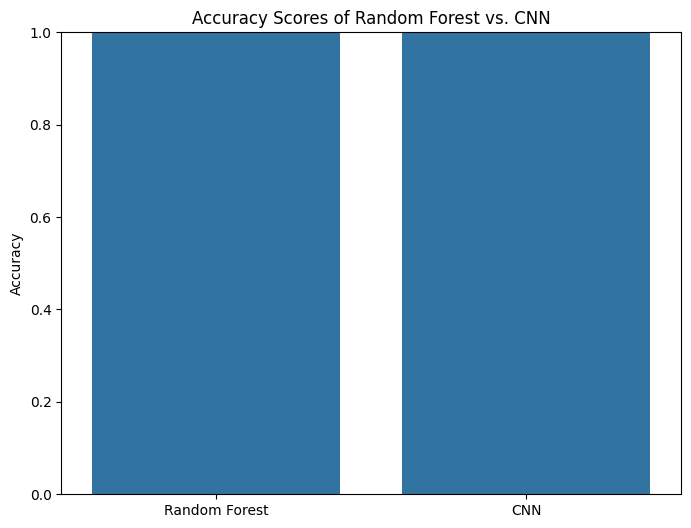

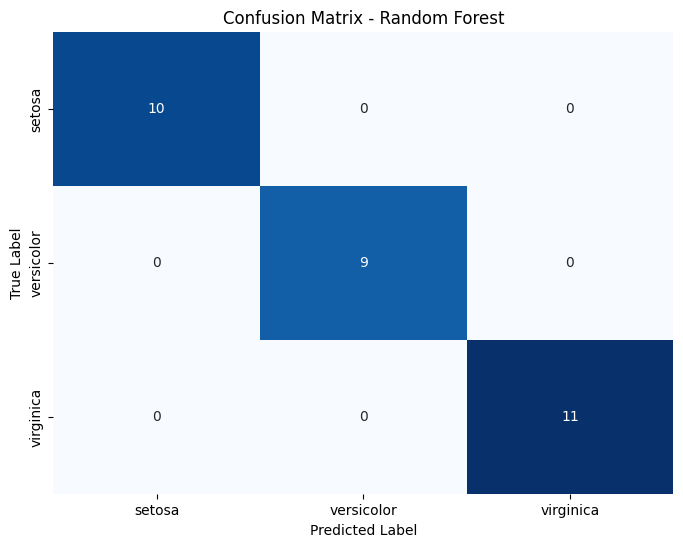

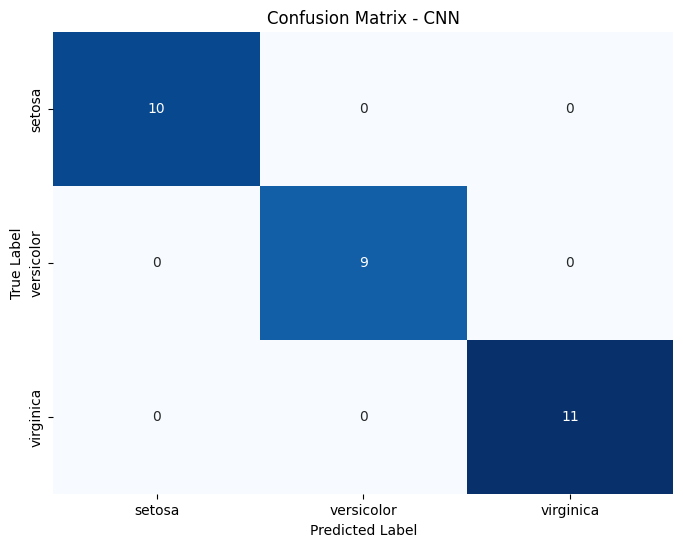

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris # Load Iris dataset from sklearn
from sklearn.model_selection import train_test_split # Split dataset into training and testing sets
from sklearn.preprocessing import StandardScaler # Standardize the features

from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score # Import metrics to evaluate model performance

import tensorflow as tf # TensorFlow for building and training neural networks
from tensorflow.keras.models import Sequential # Import Sequential model and layers from Keras (high-level API of TensorFlow)
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.utils import to_categorical # Utility for converting class vectors to binary class matrices
from tensorflow.keras.optimizers import Adam # Import Adam optimizer for compiling the neural network
import numpy as np # Import NumPy for numerical operations
import matplotlib.pyplot as plt # Import Matplotlib for plotting
import seaborn as sns # Import Seaborn for more advanced statistical visualizations

# Data Preparation
# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_f1_score = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Confusion Matrix:\n{rf_conf_matrix}")
print(f"Random Forest F1 Score: {rf_f1_score}")

# CNN
# Reshape data for CNN (4 features become 4 channels of 1-dimensional data)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Build CNN model
cnn = Sequential()
cnn.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(4, 1)))
cnn.add(Flatten())
cnn.add(Dense(3, activation='softmax'))

# Compile model with explicit learning rate
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN with specified batch size and epochs
batch_size = 8
epochs = 100
cnn.fit(X_train_cnn, y_train_cnn, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate CNN
cnn_loss, cnn_accuracy = cnn.evaluate(X_test_cnn, y_test_cnn)
y_pred_cnn = cnn.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
cnn_conf_matrix = confusion_matrix(y_test, y_pred_cnn_classes)
cnn_f1_score = f1_score(y_test, y_pred_cnn_classes, average='weighted')

print(f"CNN Accuracy: {cnn_accuracy}")
print(f"CNN Confusion Matrix:\n{cnn_conf_matrix}")
print(f"CNN F1 Score: {cnn_f1_score}")

# Visualize Accuracy Scores
methods = ['Random Forest', 'CNN']
accuracy_scores = [rf_accuracy, cnn_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=methods, y=accuracy_scores)
plt.title('Accuracy Scores of Random Forest vs. CNN')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Visualize Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Confusion Matrix for CNN
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
